# **Basic Matplotlib**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## **Simple line chart**

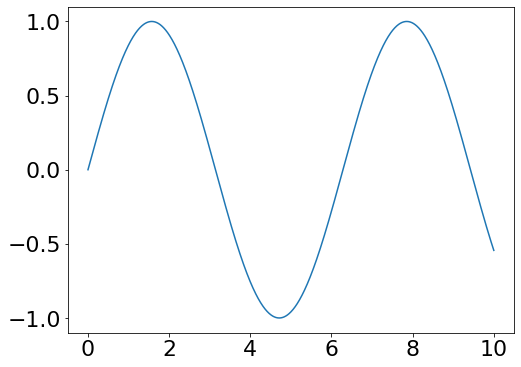

In [2]:
fig = plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 22})
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x));

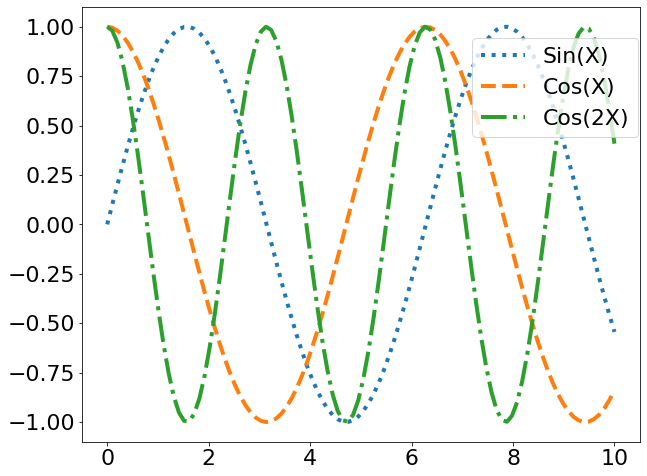

In [3]:
fig = plt.figure(figsize=(10,8))
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x),linestyle=":",linewidth=4, label="Sin(X)")
plt.plot(x,np.cos(x),linestyle="--",linewidth=4, label="Cos(X)")
plt.plot(x,np.cos(2*x),linestyle="-.",linewidth=4, label="Cos(2X)")
plt.legend(loc=[0.7,0.7]);

## **Histogram plot**

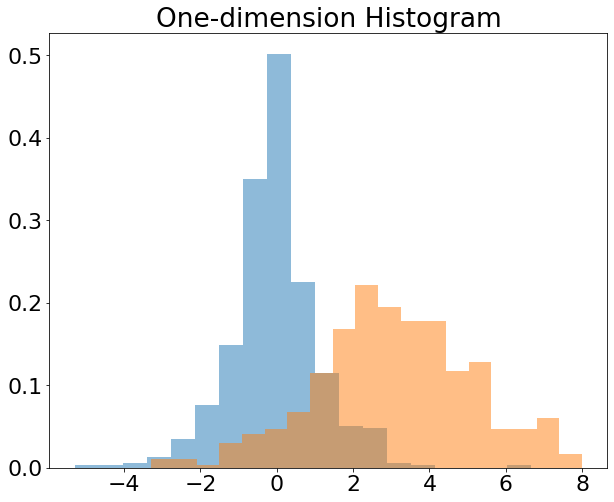

In [4]:
fig = plt.figure(figsize=(10,8))
x1 = np.random.laplace(0, 0.8, 500)
x2 = np.random.normal(3, 2, 500)
plt.hist(x1, alpha=0.5, density=True, bins=np.linspace(min(x1),max(x1),20))
plt.hist(x2, alpha=0.5, density=True, bins=np.linspace(min(x2),max(x2),20))
plt.title("One-dimension Histogram");

## **Boxplot**

Text(0.5, 1.0, 'Boxplot of 2017 Net Immigration Rate of Texas Counties')

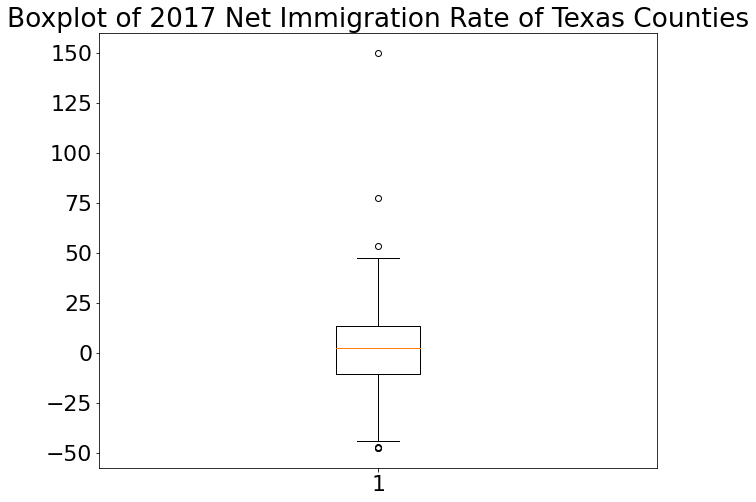

In [5]:
import pandas as pd
fig = plt.figure(figsize=(10,8))
df = pd.read_excel("PopulationEstimates.xls",skiprows=2)
dfTX = df[df["State"]=="TX"].tail(-1)
plt.boxplot(dfTX['R_NET_MIG_2017'])
plt.title("Boxplot of 2017 Net Immigration Rate of Texas Counties")

## **Scatter plot**

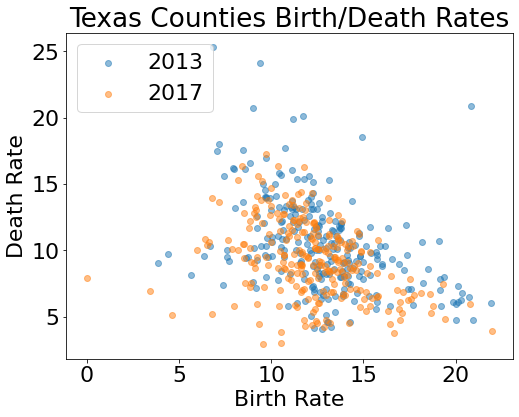

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(dfTX.R_birth_2013,dfTX.R_death_2013,alpha=0.5,label="2013")
plt.scatter(dfTX.R_birth_2017,dfTX.R_death_2017,alpha=0.5,label="2017")
plt.legend()
plt.xlabel("Birth Rate")
plt.ylabel("Death Rate")
plt.title("Texas Counties Birth/Death Rates");

## **Bar plot**

In [7]:
birthRates = list(filter(lambda x: x.startswith("R_birth"),dfTX.columns))
deathRates = list(filter(lambda x: x.startswith("R_death"),dfTX.columns))
years = np.array(list(map(lambda x: int(x[-4:]), birthRates)))

In [8]:
dfTX.iloc[0]

FIPS                                         48001
State                                           TX
Area_Name                          Anderson County
Rural-urban_Continuum Code_2003                5.0
Rural-urban_Continuum Code_2013                7.0
                                        ...       
R_NET_MIG_2014                           -0.051802
R_NET_MIG_2015                            -2.83995
R_NET_MIG_2016                           -0.729192
R_NET_MIG_2017                           12.266547
R_NET_MIG_2018                            -0.80847
Name: 2568, Length: 149, dtype: object

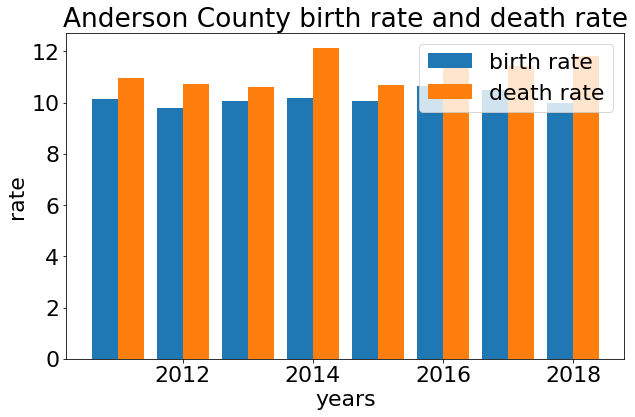

In [9]:
plt.figure(figsize=(10,6))
width=0.4
plt.bar(years-width/2, dfTX.iloc[0][birthRates],
        width=width, label= "birth rate", alpha = 1)
plt.bar(years+width/2, dfTX.iloc[0][deathRates],
        width=width,label="death rate", alpha = 1)
plt.xlabel("years")
plt.ylabel("rate")
plt.legend()
plt.title("Anderson County birth rate and death rate");

## **Line chart for the same data**

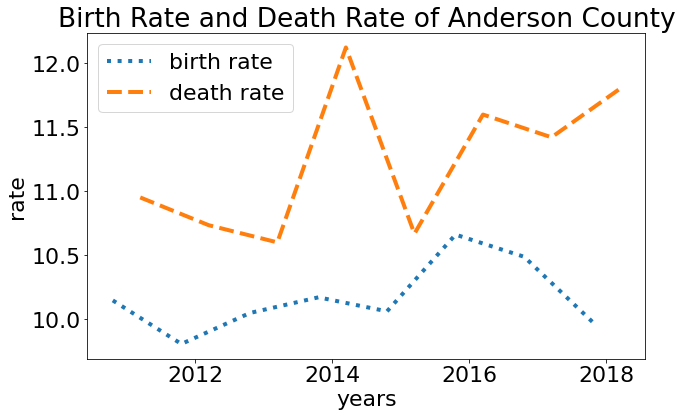

In [10]:
plt.figure(figsize=(10,6))
width=0.4
plt.plot(years-width/2, dfTX.iloc[0][birthRates], label= "birth rate",linestyle=":",linewidth=4)
plt.plot(years+width/2, dfTX.iloc[0][deathRates], label="death rate",linestyle="--",linewidth=4)
plt.xlabel("years")
plt.ylabel("rate")
plt.legend()
plt.title("Birth Rate and Death Rate of Anderson County");

# **Advanced Visualization Customization**

build feature mask

In [11]:
birthRates = list(filter(lambda x: x.startswith("R_birth"),dfTX.columns))
popChanges = list(filter(lambda x: x.startswith("N_POP_CHG"),dfTX.columns))
years = np.array(list(map(lambda x: int(x[-4:]), birthRates)))

In [12]:
popChanges[1:]

['N_POP_CHG_2011',
 'N_POP_CHG_2012',
 'N_POP_CHG_2013',
 'N_POP_CHG_2014',
 'N_POP_CHG_2015',
 'N_POP_CHG_2016',
 'N_POP_CHG_2017',
 'N_POP_CHG_2018']

## **Axis-sharing and subplots**

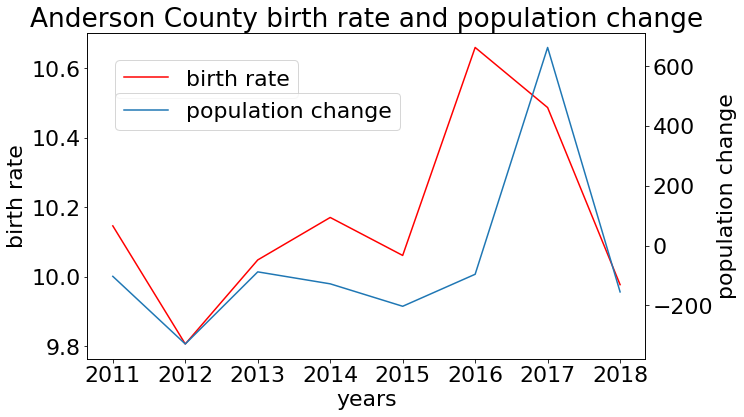

In [13]:
figure, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(years, dfTX.iloc[0][birthRates], label= "birth rate",c="red")
ax2 = ax1.twinx()
ax2.plot(years, dfTX.iloc[0][popChanges][1:], label="population change")
ax1.set_xlabel("years")
ax1.set_ylabel("birth rate")
ax2.set_ylabel("population change")
ax1.legend(loc=[0.05,0.8])
ax2.legend(loc=[0.05,0.7])
plt.title("Anderson County birth rate and population change");

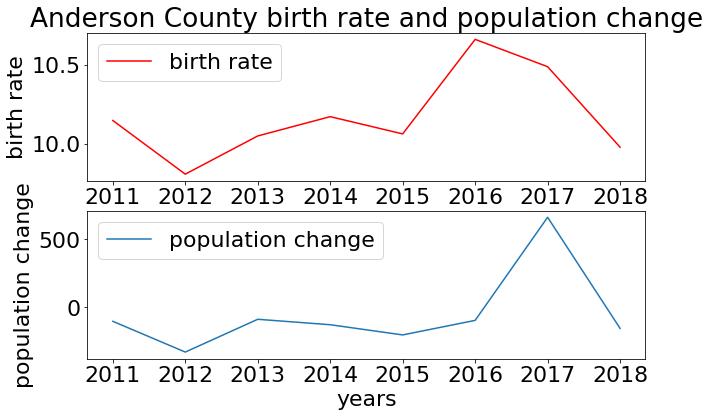

In [14]:
figure, axes = plt.subplots(2,1,figsize=(10,6))
axes[0].plot(years, dfTX.iloc[0][birthRates], label= "birth rate",c="red")
axes[1].plot(years, dfTX.iloc[0][popChanges][1:], label="population change")
axes[1].set_xlabel("years")
axes[0].set_ylabel("birth rate")
axes[1].set_ylabel("population change")
axes[0].legend()
axes[1].legend()
axes[0].set_title("Anderson County birth rate and population change");

## **Scale Change**

In [15]:
coronaCases = pd.read_csv("total_cases_03_15_2020.csv")
from datetime import datetime
coronaCases["date"] = coronaCases["date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

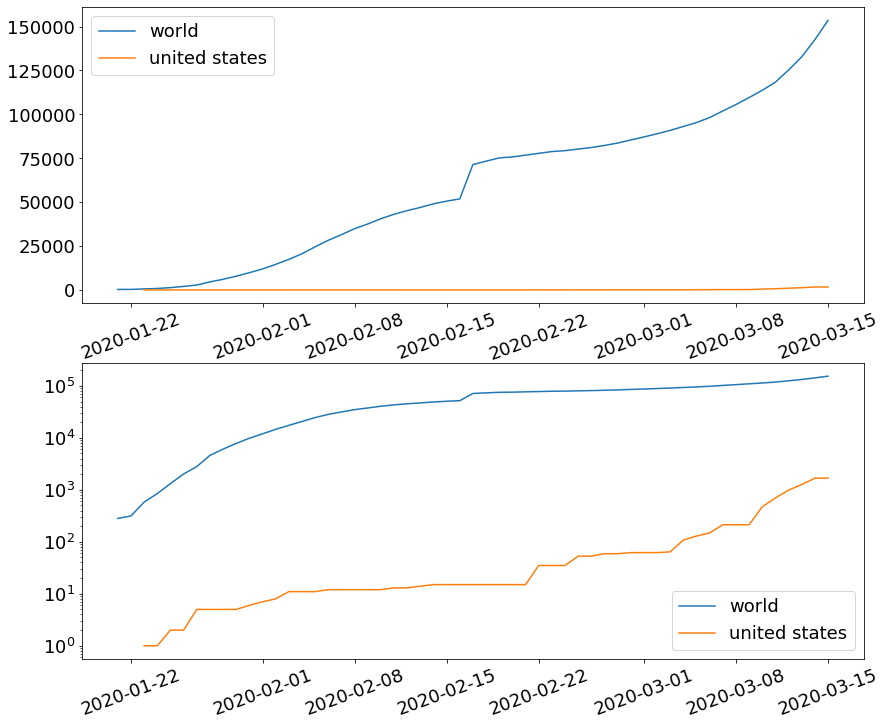

In [16]:
plt.rcParams.update({'font.size': 18})
figure, axes = plt.subplots(2,1,figsize=(14,12))
axes[0].plot(coronaCases["date"],coronaCases["World"],label="world")
axes[0].plot(coronaCases["date"],coronaCases["United States"],label="united states")
axes[1].plot(coronaCases["date"],coronaCases["World"],label="world")
axes[1].plot(coronaCases["date"],coronaCases["United States"],label="united states")
axes[0].legend()
axes[1].legend()
plt.setp( axes[0].xaxis.get_majorticklabels(), rotation=20 )
plt.setp( axes[1].xaxis.get_majorticklabels(), rotation=20 )
axes[1].set_yscale("log");

## **Customize Aesthetics**
### Markers

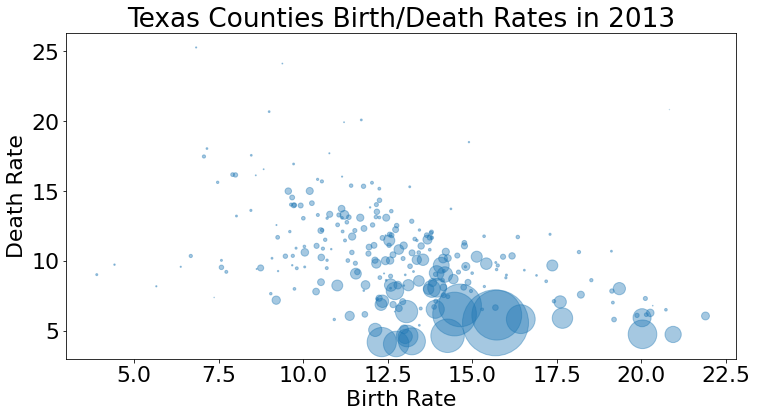

In [17]:
plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 22})
dfTemp = dfTX
plt.scatter(dfTemp.R_birth_2013,
            dfTemp.R_death_2013,
            alpha=0.4,
            s = dfTemp.POP_ESTIMATE_2013/1000,
            )
plt.xlabel("Birth Rate")
plt.ylabel("Death Rate")
plt.title("Texas Counties Birth/Death Rates in 2013");

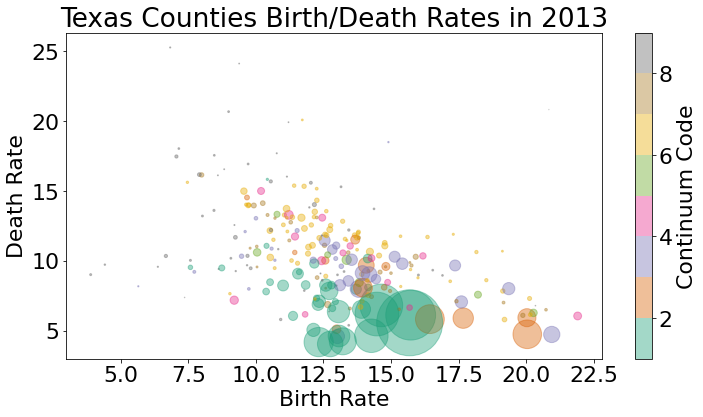

In [18]:
plt.figure(figsize=(12,6))
plt.scatter(dfTX.R_birth_2013,
            dfTX.R_death_2013,
            alpha=0.4,
            s = dfTX.POP_ESTIMATE_2013/1000,
            c= dfTX["Rural-urban_Continuum Code_2003"],
            cmap =  'Dark2',
            )
cbar = plt.colorbar()
cbar.ax.set_ylabel('Continuum Code',rotation=90)
plt.xlabel("Birth Rate")
plt.ylabel("Death Rate")
plt.title("Texas Counties Birth/Death Rates in 2013");

## **Query-oriented statistical plotting**
Examples of API usage

In [19]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


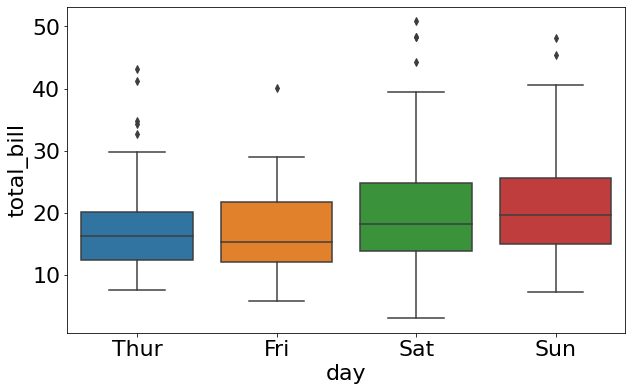

In [20]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="day", y="total_bill", data=tips)

### **Example One: Prepare data to fit plotting function API**

In [21]:
dfTX.head()

,FIPS,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,...,R_DOMESTIC_MIG_2017,R_DOMESTIC_MIG_2018,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018
2568,48001,TX,Anderson County,5.0,7.0,8.0,8.0,4.0,58458,58459,...,11.471813,-1.616940,-0.855498,-4.722692,-0.810052,-0.051802,-2.839950,-0.729192,12.266547,-0.808470
2569,48003,TX,Andrews County,6.0,6.0,5.0,5.0,2.0,14786,14786,...,-20.882718,18.512822,26.126931,34.856036,27.658734,26.231998,23.474443,-26.025412,-19.189525,20.246651
2570,48005,TX,Angelina County,5.0,5.0,8.0,8.0,0.0,86771,86771,...,-4.194449,-10.057036,0.126292,-2.173727,-5.433135,-0.937507,-0.182364,-4.771313,-3.578959,-9.381990
2571,48007,TX,Aransas County,2.0,2.0,2.0,2.0,5.0,23158,23158,...,12.717722,-62.267715,5.388396,14.055838,22.641350,28.724721,14.781816,18.797744,12.836210,-62.145860
2572,48009,TX,Archer County,3.0,3.0,2.0,2.0,2.0,9054,9055,...,2.390983,-0.341452,-31.984843,-2.493907,-0.113611,6.578947,-11.253197,4.219409,2.504839,-0.227635


In [22]:
birthRatesDF = dfTX[birthRates].copy()
birthRatesDF["index"] = birthRatesDF.index;
birthRatesDFLong = pd.melt(birthRatesDF,id_vars=["index"],value_vars = birthRatesDF.columns[:-1])
birthRatesDFLong["variable"] = birthRatesDFLong["variable"].apply(lambda x: int(x[-4:]))

In [23]:
birthRatesDFLong

,index,variable,value
0,2568,2011,10.146205
1,2569,2011,17.197473
2,2570,2011,14.259472
3,2571,2011,10.043969
4,2572,2011,7.243954
...,...,...,...
2027,2817,2018,9.170208
2028,2818,2018,17.489652
2029,2819,2018,11.936818
2030,2820,2018,17.068802


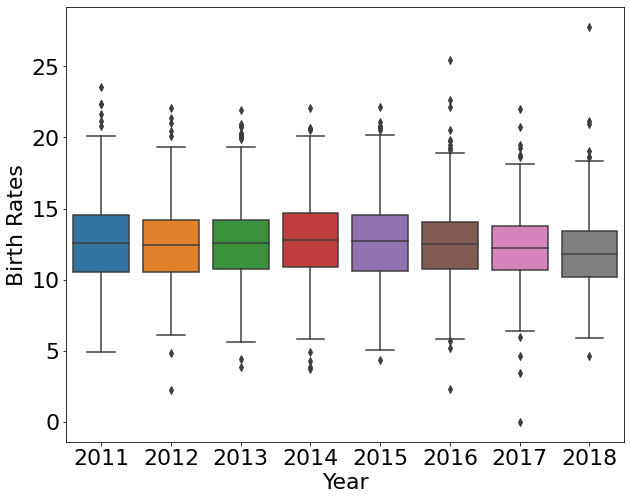

In [24]:
plt.figure(figsize=(10,8))
sns.boxplot(x="variable", y="value", data=birthRatesDFLong);
plt.xlabel("Year")
plt.ylabel("Birth Rates");

### **Example Two: Combine analysis with plain plotting**

In [25]:
dfTX.head()

,FIPS,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,...,R_DOMESTIC_MIG_2017,R_DOMESTIC_MIG_2018,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018
2568,48001,TX,Anderson County,5.0,7.0,8.0,8.0,4.0,58458,58459,...,11.471813,-1.616940,-0.855498,-4.722692,-0.810052,-0.051802,-2.839950,-0.729192,12.266547,-0.808470
2569,48003,TX,Andrews County,6.0,6.0,5.0,5.0,2.0,14786,14786,...,-20.882718,18.512822,26.126931,34.856036,27.658734,26.231998,23.474443,-26.025412,-19.189525,20.246651
2570,48005,TX,Angelina County,5.0,5.0,8.0,8.0,0.0,86771,86771,...,-4.194449,-10.057036,0.126292,-2.173727,-5.433135,-0.937507,-0.182364,-4.771313,-3.578959,-9.381990
2571,48007,TX,Aransas County,2.0,2.0,2.0,2.0,5.0,23158,23158,...,12.717722,-62.267715,5.388396,14.055838,22.641350,28.724721,14.781816,18.797744,12.836210,-62.145860
2572,48009,TX,Archer County,3.0,3.0,2.0,2.0,2.0,9054,9055,...,2.390983,-0.341452,-31.984843,-2.493907,-0.113611,6.578947,-11.253197,4.219409,2.504839,-0.227635


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


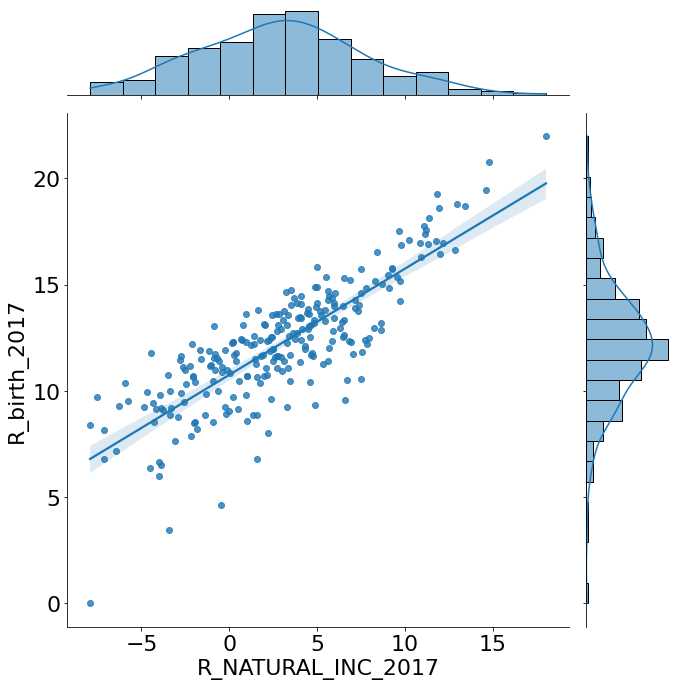

In [26]:
g = sns.jointplot("R_NATURAL_INC_2017", "R_birth_2017", data=dfTX, kind="reg",height=10)

## **Presentation-ready Plotting Tips**
list all styles available

In [27]:
style_list = ['default', 'classic'] + sorted(
        style for style in plt.style.available if style != 'classic')
style_list

['default',
 'classic',
 'Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Change the styles to `grayscale`.

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x432 with 0 Axes>

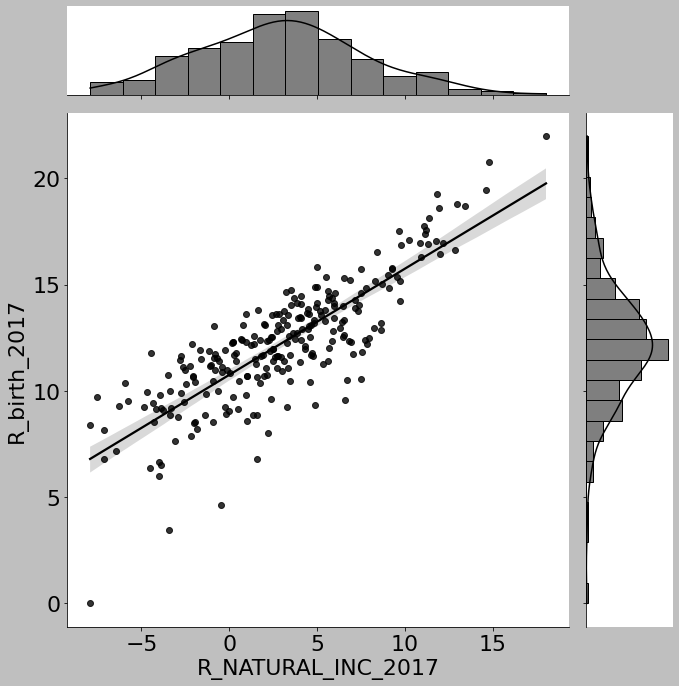

In [28]:
with plt.style.context('grayscale'):
    plt.figure(figsize=(12,6));
    g = sns.jointplot("R_NATURAL_INC_2017", "R_birth_2017", data=dfTX, kind="reg",height=10);